In [2]:
from datetime import date, datetime, timedelta
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader
from pandas_datareader.fred import FredReader
import rnd_stuff.tr_approx as approx
import matplotlib as mpl

In [3]:
mpl.rcParams['figure.figsize'] = [18.0, 10.0]

# UST

In [4]:
# https://fred.stlouisfed.org/series/DGS10
# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (DGS10) 
# Market Yield on U.S. Treasury Securities at 30-Year Constant Maturity (DGS30) 
ust = FredReader(['DGS10'], start=datetime.today() - timedelta(days=365*100)).read()
ust = ust.reindex(pd.date_range(ust.index[0], ust.index[-1])).ffill().dropna()
ust = ust / 100

In [5]:
trs = pd.DataFrame()

In [6]:
trs['ust10'] = (approx.tr(ust['DGS10'], 10.0) + 1).cumprod()

# Corp bonds


In [7]:
## https://fred.stlouisfed.org/series/BAMLCC7A01015YTRIV
## ICE BofA 10-15 Year US Corporate Index Total Return
## Index Value (BAMLCC7A01015YTRIV)
## https://fred.stlouisfed.org/series/BAMLCC3A057YTRIV
## ICE BofA 5-7 Year US Corporate Index Total Return #
## Index Value (BAMLCC3A057YTRIV)
uscorp_ix = FredReader(
    ['BAMLCC3A057YTRIV', 'BAMLCC7A01015YTRIV'],
    start=datetime.today() - timedelta(days=365*100)
).read().ffill().dropna()

In [8]:
trs[['corp_mt', 'corp_lt']] = uscorp_ix[['BAMLCC3A057YTRIV', 'BAMLCC7A01015YTRIV']]

# Stocks

In [9]:
# Wilshire US Mid-Cap Total Market Index (WILLMIDCAP) 
# https://fred.stlouisfed.org/series/WILLMIDCAP
# Wilshire US Large-Cap Total Market Index (WILLLRGCAP) 
# https://fred.stlouisfed.org/series/WILLLRGCAP
# Wilshire US Real Estate Investment Trust Total Market Index (Wilshire US REIT) (WILLREITIND) 

# Wilshire US Small-Cap Total Market Index (WILLSMLCAP) 

df = FredReader(
    ['WILLSMLCAP',
     'WILLMIDCAP',
     'WILLLRGCAP',
    ],
    start=datetime.today() - timedelta(days=365*100)
).read().ffill().dropna()

In [10]:
trs[['sm_cap', 'md_cap', 'lg_cap']] = df[['WILLSMLCAP', 'WILLMIDCAP', 'WILLLRGCAP']]

# Gold

In [11]:
# Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars (GOLDAMGBD228NLBM) 

# https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM
gold = FredReader(['GOLDAMGBD228NLBM'], start=datetime.today() - timedelta(days=365*100)).read().ffill().dropna()
gold

,GOLDAMGBD228NLBM
DATE,
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-10-26,1801.90
2021-10-27,1783.85
2021-10-28,1798.20


In [12]:
trs['gold'] = gold['GOLDAMGBD228NLBM']

# REIT

In [14]:
# Wilshire US Real Estate Investment Trust Total Market Index (Wilshire US REIT) (WILLREITIND) 
# https://fred.stlouisfed.org/series/WILLREITIND
reit = FredReader(['WILLREITIND'], start=datetime.today() - timedelta(days=365*100)).read().ffill().dropna()
reit

,WILLREITIND
DATE,
1977-12-30,100.00
1978-01-02,100.00
1978-01-03,100.00
1978-01-04,100.00
1978-01-05,100.00
...,...
2021-10-26,14767.48
2021-10-27,14663.79
2021-10-28,14898.74


In [15]:
trs['reit'] = reit['WILLREITIND']

In [18]:
trs = trs.dropna()

In [19]:
rets = (trs/trs.shift(365, freq='D')).dropna()
rets

,ust10,corp_mt,corp_lt,sm_cap,md_cap,lg_cap,gold,reit
1991-03-12,1.167559,1.111100,1.127625,1.029782,1.090961,1.142569,0.908966,0.920729
1991-03-13,1.180829,1.113580,1.132104,1.029782,1.090961,1.142569,0.919089,0.920729
1991-03-14,1.174581,1.115100,1.133933,1.029782,1.090961,1.142569,0.917001,0.920729
1991-03-15,1.168992,1.111455,1.126710,1.029782,1.090961,1.142569,0.914487,0.920729
1991-03-19,1.151832,1.102572,1.112910,1.029782,1.090961,1.142569,0.902181,0.920729
...,...,...,...,...,...,...,...,...
2021-10-22,0.947205,1.008444,1.009837,1.456488,1.380246,1.343167,0.935024,1.448877
2021-10-26,0.944496,1.008436,1.009974,1.479113,1.401591,1.372122,0.947570,1.473324
2021-10-27,0.950577,1.010245,1.016023,1.467496,1.393964,1.367647,0.939412,1.490944
2021-10-28,0.947980,1.009426,1.014548,1.538503,1.455355,1.431767,0.947993,1.554227


<AxesSubplot:>

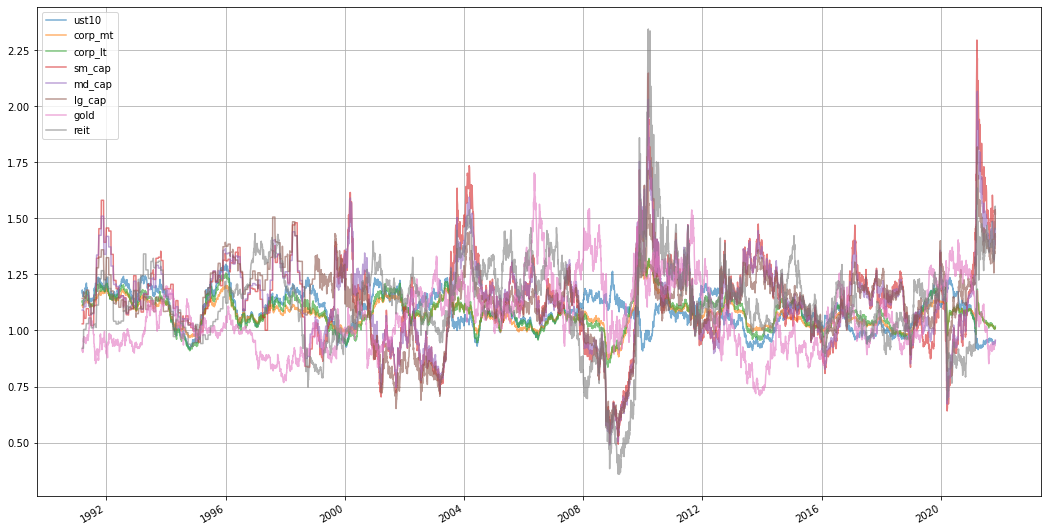

In [20]:
rets.plot(grid=True, alpha=0.6)

# Macroeconomic

In [24]:
# Real Gross Domestic Product (A191RL1Q225SBEA) (pct change to last period, quaterly)
# Median Consumer Price Index (MEDCPIM157SFRBCLE) (median cpi, pct change to period, monthly)
macro = FredReader(
    ['A191RL1Q225SBEA', 'MEDCPIM157SFRBCLE'],
    start=datetime.today() - timedelta(days=365*100),
).read()
macro = macro.rename(columns={
    'A191RL1Q225SBEA': 'gdp',
    'MEDCPIM157SFRBCLE': 'cpi',
})
macro['gdp'] = macro['gdp']/100
macro

,gdp,cpi
DATE,,
1947-04-01,-0.011,NaN
1947-07-01,-0.008,NaN
1947-10-01,0.064,NaN
1948-01-01,0.062,NaN
1948-04-01,0.068,NaN
...,...,...
2021-05-01,NaN,0.263499
2021-06-01,NaN,0.238969
2021-07-01,0.020,0.301597


<AxesSubplot:xlabel='DATE'>

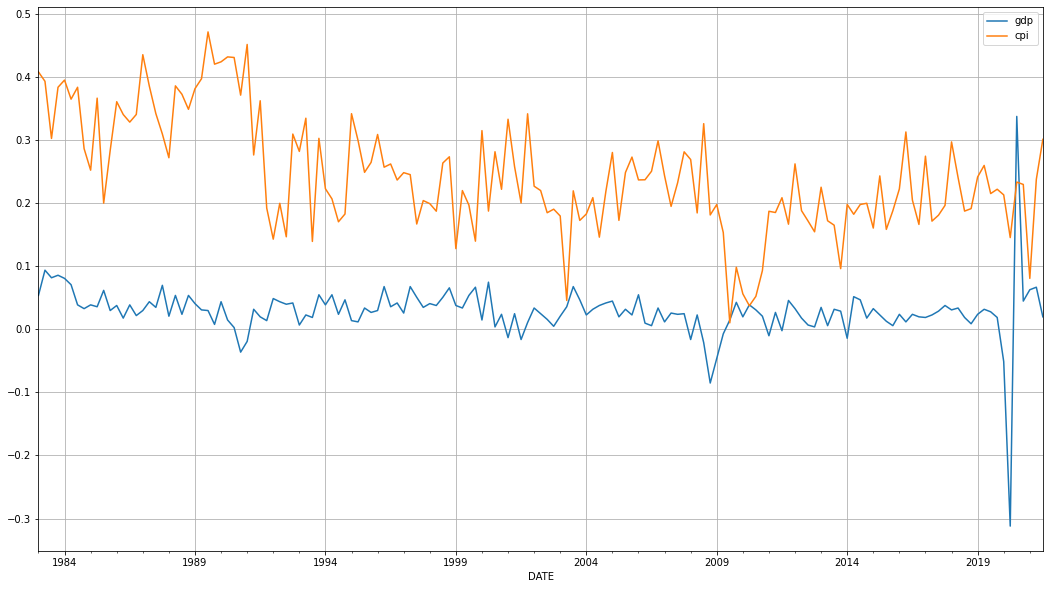

In [28]:
macro.dropna().plot(grid=True)

<AxesSubplot:>

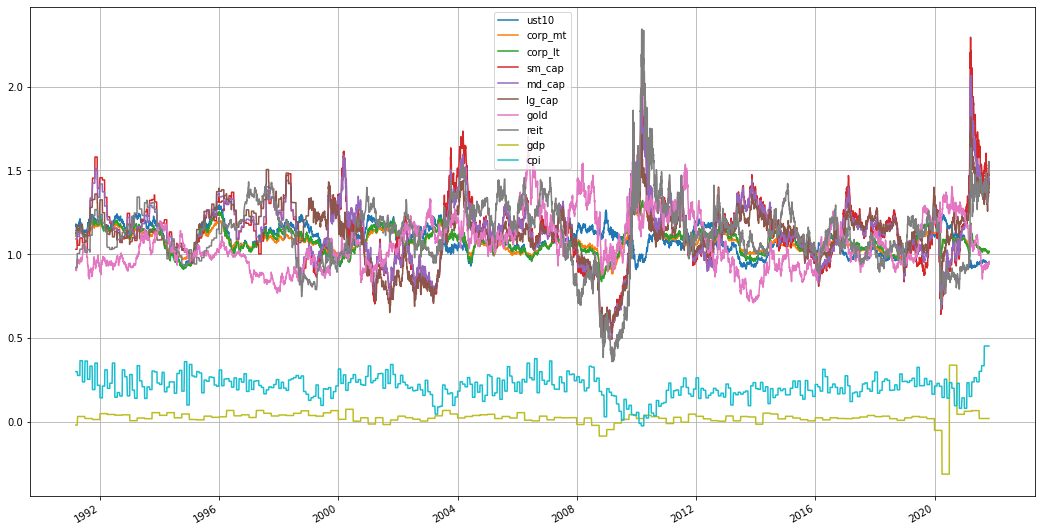

In [33]:
pd.concat([rets, macro.ffill().dropna()], axis=1).ffill().dropna().plot(grid=True)